In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


2025-01-22 07:58:04.911509: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-22 07:58:05.134471: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-22 07:58:05.349384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737532685.512772   14167 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737532685.559601   14167 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 07:58:05.924272: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [5]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 695s 3us/step


In [6]:
data_dir

'./datasets/flower_photos'

In [9]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [15]:
image_count=len(list(data_dir.glob('*/*/*.jpg')))
image_count

3670

In [19]:
roses=list(data_dir.glob('*/roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/873660804_37f5c6a46e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1801614110_bb9fa46830.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1666341535_99c6f7509f_n.jpg')]

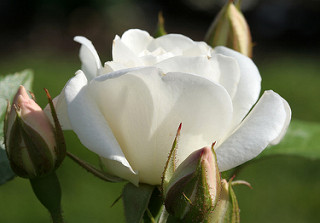

In [22]:
PIL.Image.open(str(roses[1]))

In [24]:
tulips=list(data_dir.glob('*/tulips/*.jpg'))
len(tulips)

799

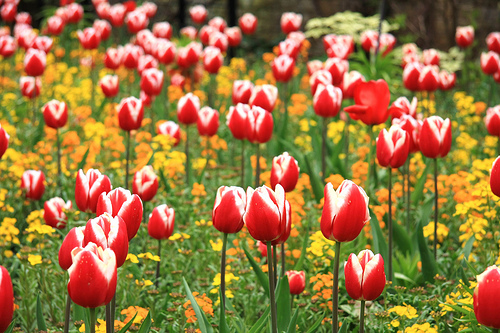

In [25]:
PIL.Image.open(str(tulips[0]))

In [26]:
flowers_images_dict={
    'rose':list(data_dir.glob('*/roses/*')),
    'daisy':list(data_dir.glob('*/daisy/*')),
    'dandelion':list(data_dir.glob('*/dandelion/*')),
    'sunflowers':list(data_dir.glob('*/sunflowers/*')),
    'tulips':list(data_dir.glob('*/tulips/*')),
}

In [27]:
flowers_images_dict['rose']

[PosixPath('datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/873660804_37f5c6a46e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1801614110_bb9fa46830.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1666341535_99c6f7509f_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5398974188_799753449c.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/295257304_de893fc94d.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5897035797_e67bf68124_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3278709893_ba4956a572_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/18741313803_1bbf842fc6_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1485142251_ca89254442.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/624188

In [28]:
flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/flower_photos/daisy/3957488431_52a447c0e8_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/5602738326_97121e007d_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/3456403987_5bd5fa6ece_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/14221848160_7f0a37c395.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/8063844363_db3f4dea85.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/267148092_4bb874af58.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/5435521200_92029bbe2b_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/3468498624_d082f99e98.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/3338077096_3a8ed0e2bc_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/5434914569_e9b982fde0_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2666572212_2caca8de9f_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/7215958

In [41]:
flowers_labels_dict={
    'rose':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [30]:
flowers_images_dict['rose'][0]

PosixPath('datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg')

In [32]:
str(flowers_images_dict['rose'][0])

'datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'

In [35]:
img=cv2.imread(str(flowers_images_dict['rose'][0]))
img

array([[[192, 175, 212],
        [195, 181, 222],
        [175, 165, 211],
        ...,
        [  6,   2,   1],
        [  0,   5,   0],
        [  0,  11,   0]],

       [[ 77,  69, 169],
        [ 83,  77, 178],
        [ 94,  90, 195],
        ...,
        [  6,  20,  19],
        [  2,   8,   3],
        [  5,  16,   6]],

       [[ 44,  31, 183],
        [ 29,  15, 170],
        [ 17,   1, 162],
        ...,
        [  1,  28,  32],
        [  4,   5,   3],
        [  4,  11,   4]],

       ...,

       [[ 86,  59, 176],
        [ 86,  66, 165],
        [ 91,  73, 167],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 94,  63, 178],
        [ 91,  65, 172],
        [ 90,  65, 175],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[103,  66, 190],
        [ 97,  64, 185],
        [ 90,  52, 188],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]]

In [34]:
img.shape

(240, 320, 3)

In [36]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [43]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
    # print(flower_name)
    # print(len(images))
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [46]:
y[:-100]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [47]:
X[0]

array([[[174, 160, 208],
        [158, 150, 206],
        [135, 133, 200],
        ...,
        [  7,  52,  67],
        [  7,   7,   8],
        [  1,   9,   1]],

       [[ 59,  48, 175],
        [ 58,  48, 182],
        [ 62,  52, 188],
        ...,
        [ 26,  60,  80],
        [  6,  29,  32],
        [  4,  11,   4]],

       [[ 50,  43, 174],
        [ 51,  32, 190],
        [ 53,  28, 193],
        ...,
        [ 31,  67,  82],
        [  2,  24,  30],
        [  2,   6,   1]],

       ...,

       [[ 84,  55, 173],
        [ 91,  67, 174],
        [ 96,  57, 193],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[ 89,  63, 174],
        [ 90,  68, 172],
        [ 91,  58, 177],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[ 99,  65, 186],
        [ 89,  52, 186],
        [ 82,  40, 180],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]]

In [49]:
X=np.array(X)
y=np.array(y)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [52]:
len(X_train)

2752

In [53]:
len(X_test)

918

In [54]:
X[0]

array([[[174, 160, 208],
        [158, 150, 206],
        [135, 133, 200],
        ...,
        [  7,  52,  67],
        [  7,   7,   8],
        [  1,   9,   1]],

       [[ 59,  48, 175],
        [ 58,  48, 182],
        [ 62,  52, 188],
        ...,
        [ 26,  60,  80],
        [  6,  29,  32],
        [  4,  11,   4]],

       [[ 50,  43, 174],
        [ 51,  32, 190],
        [ 53,  28, 193],
        ...,
        [ 31,  67,  82],
        [  2,  24,  30],
        [  2,   6,   1]],

       ...,

       [[ 84,  55, 173],
        [ 91,  67, 174],
        [ 96,  57, 193],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[ 89,  63, 174],
        [ 90,  68, 172],
        [ 91,  58, 177],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[ 99,  65, 186],
        [ 89,  52, 186],
        [ 82,  40, 180],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]]

In [56]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [57]:
X_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.10196078, 0.03921569],
        [0.00392157, 0.0745098 , 0.01176471],
        [0.00392157, 0.01176471, 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.05882353, 0.01568627],
        [0.00784314, 0.04313725, 0.00392157],
        [0.        , 0.00392157, 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.0745098 , 0.01960784],
        [0.00392157, 0.03137255, 0.        ],
        [0.00784314, 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [59]:
num_classes=5
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
model.fit(X_train_scaled,y_train,epochs=5)
              

2025-01-23 08:17:05.006323: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-01-23 08:17:07.166591: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1069977600 exceeds 10% of free system memory.


Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 418ms/step - accuracy: 0.2854 - loss: 1.5885
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 417ms/step - accuracy: 0.6050 - loss: 1.0003
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 404ms/step - accuracy: 0.6912 - loss: 0.8298
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 373ms/step - accuracy: 0.7492 - loss: 0.6886
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 417ms/step - accuracy: 0.8366 - loss: 0.4605


In [60]:
model.evaluate(X_test_scaled,y_test)


2025-01-23 08:20:19.380665: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 356918400 exceeds 10% of free system memory.


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6387 - loss: 0.9440


[0.9430190324783325, 0.64161217212677]

In [61]:
predictions=model.predict(X_test_scaled)
predictions

 1/29 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step

2025-01-23 08:20:27.313791: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 356918400 exceeds 10% of free system memory.


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step


array([[ 2.103265  ,  7.4804688 ,  0.5089414 , -5.3113847 ,  0.27818197],
       [ 2.4591982 ,  0.05732105, -0.04049379,  0.4078561 ,  1.6385174 ],
       [ 0.77379805, -0.14918698,  1.2877597 , -0.835663  ,  0.980894  ],
       ...,
       [-1.4708611 , -1.0510793 ,  0.42741984,  6.715201  ,  0.86359924],
       [ 0.4015435 , -0.95605433, -1.0494478 ,  4.7610297 ,  1.1471926 ],
       [-1.3324833 ,  0.79857564, -0.96347725,  5.979112  ,  0.8097247 ]],
      dtype=float32)

In [63]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([4.5917658e-03, 9.9373299e-01, 9.3233923e-04, 2.7659132e-06,
       7.4021233e-04], dtype=float32)>

In [64]:
np.argmax(score)

np.int64(1)

In [65]:
y_test[0]

np.int64(1)

In [71]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom
data_augmentation = keras.Sequential([
    layers.RandomZoom(0.9),
])

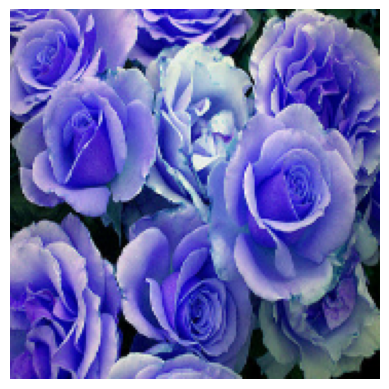

In [73]:
plt.axis('off')
plt.imshow(X[0])

In [70]:
data_augmentation(X)[0]

2025-01-23 08:37:47.308694: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 356724000 exceeds 10% of free system memory.
2025-01-23 08:37:47.484945: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1426896000 exceeds 10% of free system memory.


<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[ 79.17487  ,  74.02522  , 202.8097   ],
        [110.12412  , 103.79606  , 209.68967  ],
        [ 91.24298  ,  84.49212  , 198.89914  ],
        ...,
        [ 91.41371  ,  85.52922  , 159.8229   ],
        [103.51957  , 103.9599   , 168.01807  ],
        [ 98.27659  ,  99.475525 , 172.77046  ]],

       [[ 70.14562  ,  60.372375 , 205.35568  ],
        [ 85.98852  ,  80.66762  , 203.47813  ],
        [ 87.308014 ,  85.73401  , 206.6957   ],
        ...,
        [ 93.10171  ,  84.84637  , 171.96077  ],
        [107.26242  , 102.74817  , 177.48041  ],
        [112.92724  , 115.81343  , 173.09167  ]],

       [[ 87.92343  ,  88.457695 , 198.57834  ],
        [ 95.87828  ,  93.45275  , 203.22543  ],
        [101.9994   ,  96.314156 , 204.8877   ],
        ...,
        [105.66331  , 105.00604  , 163.7818   ],
        [105.37898  , 100.3334   , 170.7851   ],
        [103.11905  ,  91.53342  , 183.41801  ]],

       ...,

     

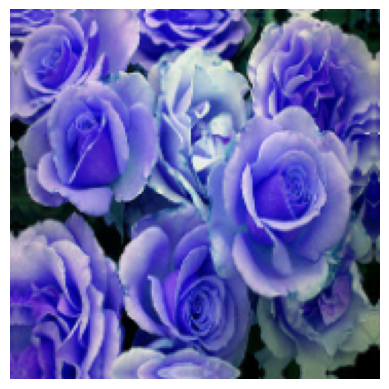

In [72]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [74]:
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.9),
])

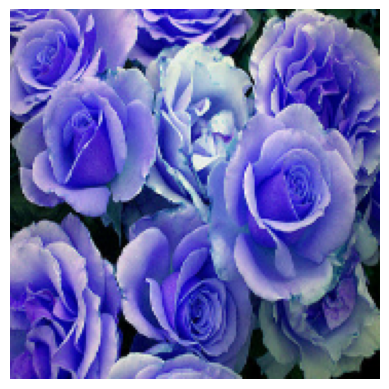

In [78]:
plt.axis('off')
plt.imshow(X[0])


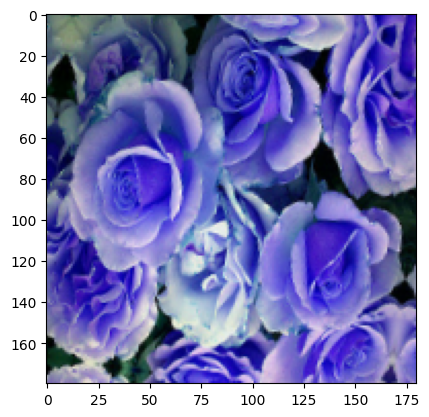

In [77]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [79]:
# add data augmentation to the model
num_classes=5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
model.fit(X_train_scaled,y_train,epochs=5)
              

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 467ms/step - accuracy: 0.2879 - loss: 1.6150
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 423ms/step - accuracy: 0.4992 - loss: 1.1758
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 452ms/step - accuracy: 0.5668 - loss: 1.0598
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 543ms/step - accuracy: 0.5999 - loss: 0.9755
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 498ms/step - accuracy: 0.6293 - loss: 0.9166


In [80]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.6663 - loss: 0.8663


[0.8880709409713745, 0.6535947918891907]